In [36]:
import numpy as np
import pandas as pd
 
# Import matplotlib for visualisations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
 
# Change backend for matplotlib to inline
%matplotlib inline

In [37]:
# Import all machine learning algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import other useful subpackage
from sklearn.metrics import accuracy_score

In [39]:
training_data = pd.read_csv('C:/Users/siddh/OneDrive/Desktop/College/TY (SEM II)/EDI sem 2/train.csv')
testing_data = pd.read_csv('C:/Users/siddh/OneDrive/Desktop/College/TY (SEM II)/EDI sem 2/test.csv')

training_data=training_data[training_data['subject']==3]
testing_data=testing_data[testing_data['subject']==3]
# For training data
print("Training Data: {}".format(training_data.shape))
print("Null values present in training data: {}".format(training_data.isnull().values.any()))
## Output:
# Training Data: (7352, 563)
# Null values present in training data: False
  
# For testing data
print("Testing Data: {}".format(testing_data.shape))
print("Null values present in testing data: {}".format(testing_data.isnull().values.any()))
## Output:
# Testing Data: (2947, 563)
# Null values present in testing data: False


Training Data: (44169, 5)
Null values present in training data: False
Testing Data: (9665, 5)
Null values present in testing data: False


In [40]:
y_train = training_data['Activity']
X_train = training_data.drop(columns = ['Activity', 'subject'])

# Get X and y for testing data
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

([<matplotlib.patches.Wedge at 0x29909bd01f0>,
 [Text(0.750370817810636, 0.80432806477096, 'running'),
  Text(-0.8494654949819891, 0.6988621987452206, 'stairs'),
  Text(-0.6730851237483628, -0.8700324224927777, 'standing'),
  Text(0.8264592306753715, -0.7259236461443265, 'walking')],
 [Text(0.4092931733512559, 0.4387243989659781, '26.10'),
  Text(-0.4633448154447213, 0.38119756295193846, '25.88'),
  Text(-0.3671373402263797, -0.474563139541515, '25.08'),
  Text(0.45079594400474804, -0.39595835244235983, '22.94')])

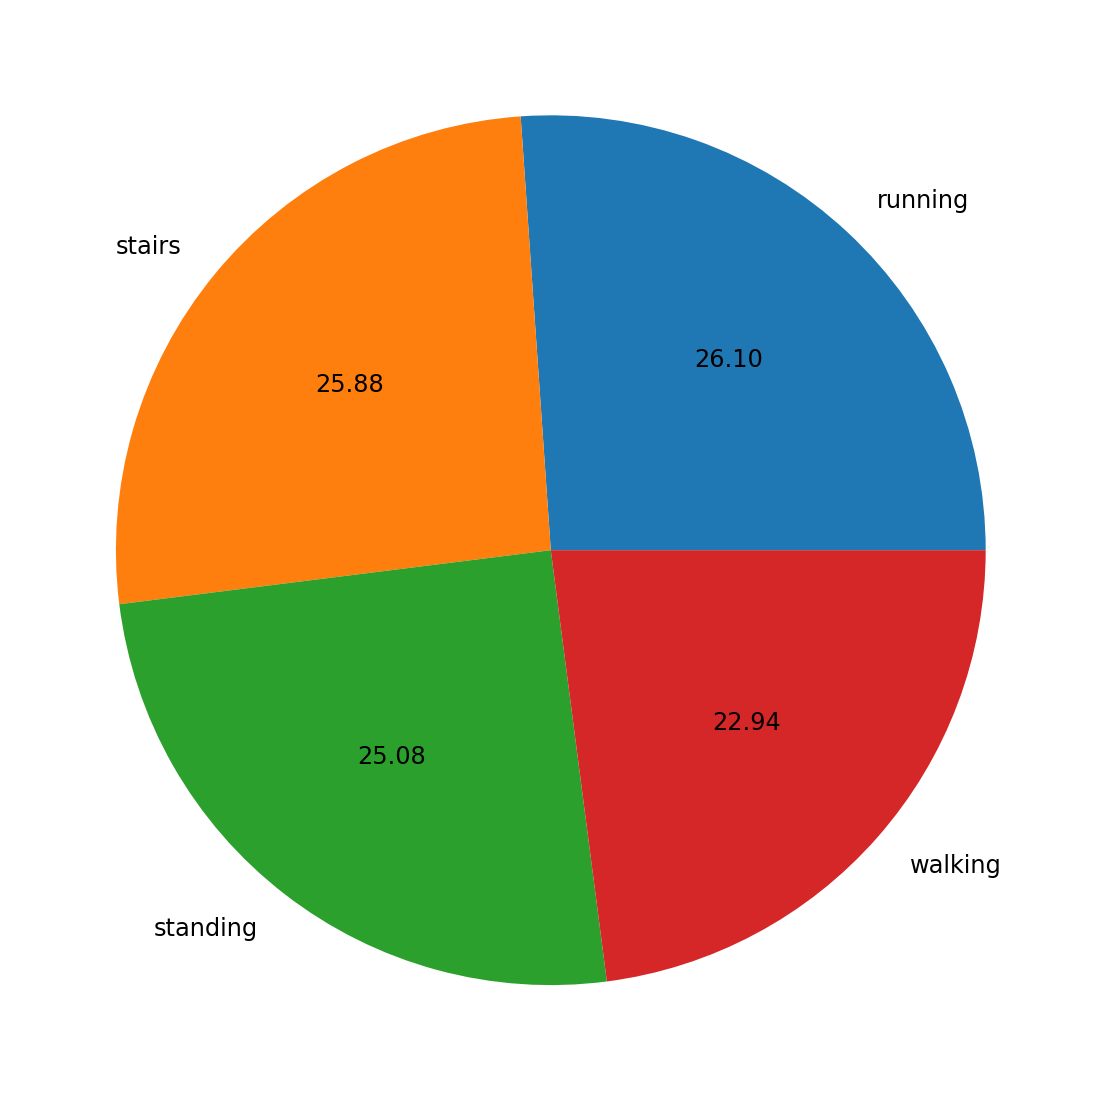

In [41]:
# Count the number of records for each activity
count_of_each_activity = np.array(y_train.value_counts())

# Identify all the unqiue activities and in sorted order
activities = sorted(y_train.unique())

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [20, 20], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

In [58]:
accuracy_scores = np.zeros(5)
# Support Vector Classifier
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))
## Output:
# Support Vector Classifier accuracy: 94.02782490668477%
#from sklearn.metrics import confusion_matrix
#fig = plt.figure(figsize=(17,5))
#ax1 = plt.subplot(121)
#import seaborn as sn
#sn.heatmap(confusion_matrix(y_test, prediction), annot = True, cmap='Blues')

# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))
## Output:
# Logistic Regression accuracy: 96.19952494061758%

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))
## Output:
# K Nearest Neighbors Classifier accuracy: 90.02375296912113%

# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

# XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction)*100
print('XGBoost accuracy: {}%'.format(accuracy_scores[4]))

Support Vector Classifier accuracy: 73.71960682876359%
Logistic Regression accuracy: 39.16192446973616%
K Nearest Neighbors Classifier accuracy: 69.18779099844801%
Random Forest Classifier accuracy: 70.26383859286084%
[23:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost accuracy: 71.10191412312467%


Text(0.5, 1.0, 'Accuracy of various algorithms')

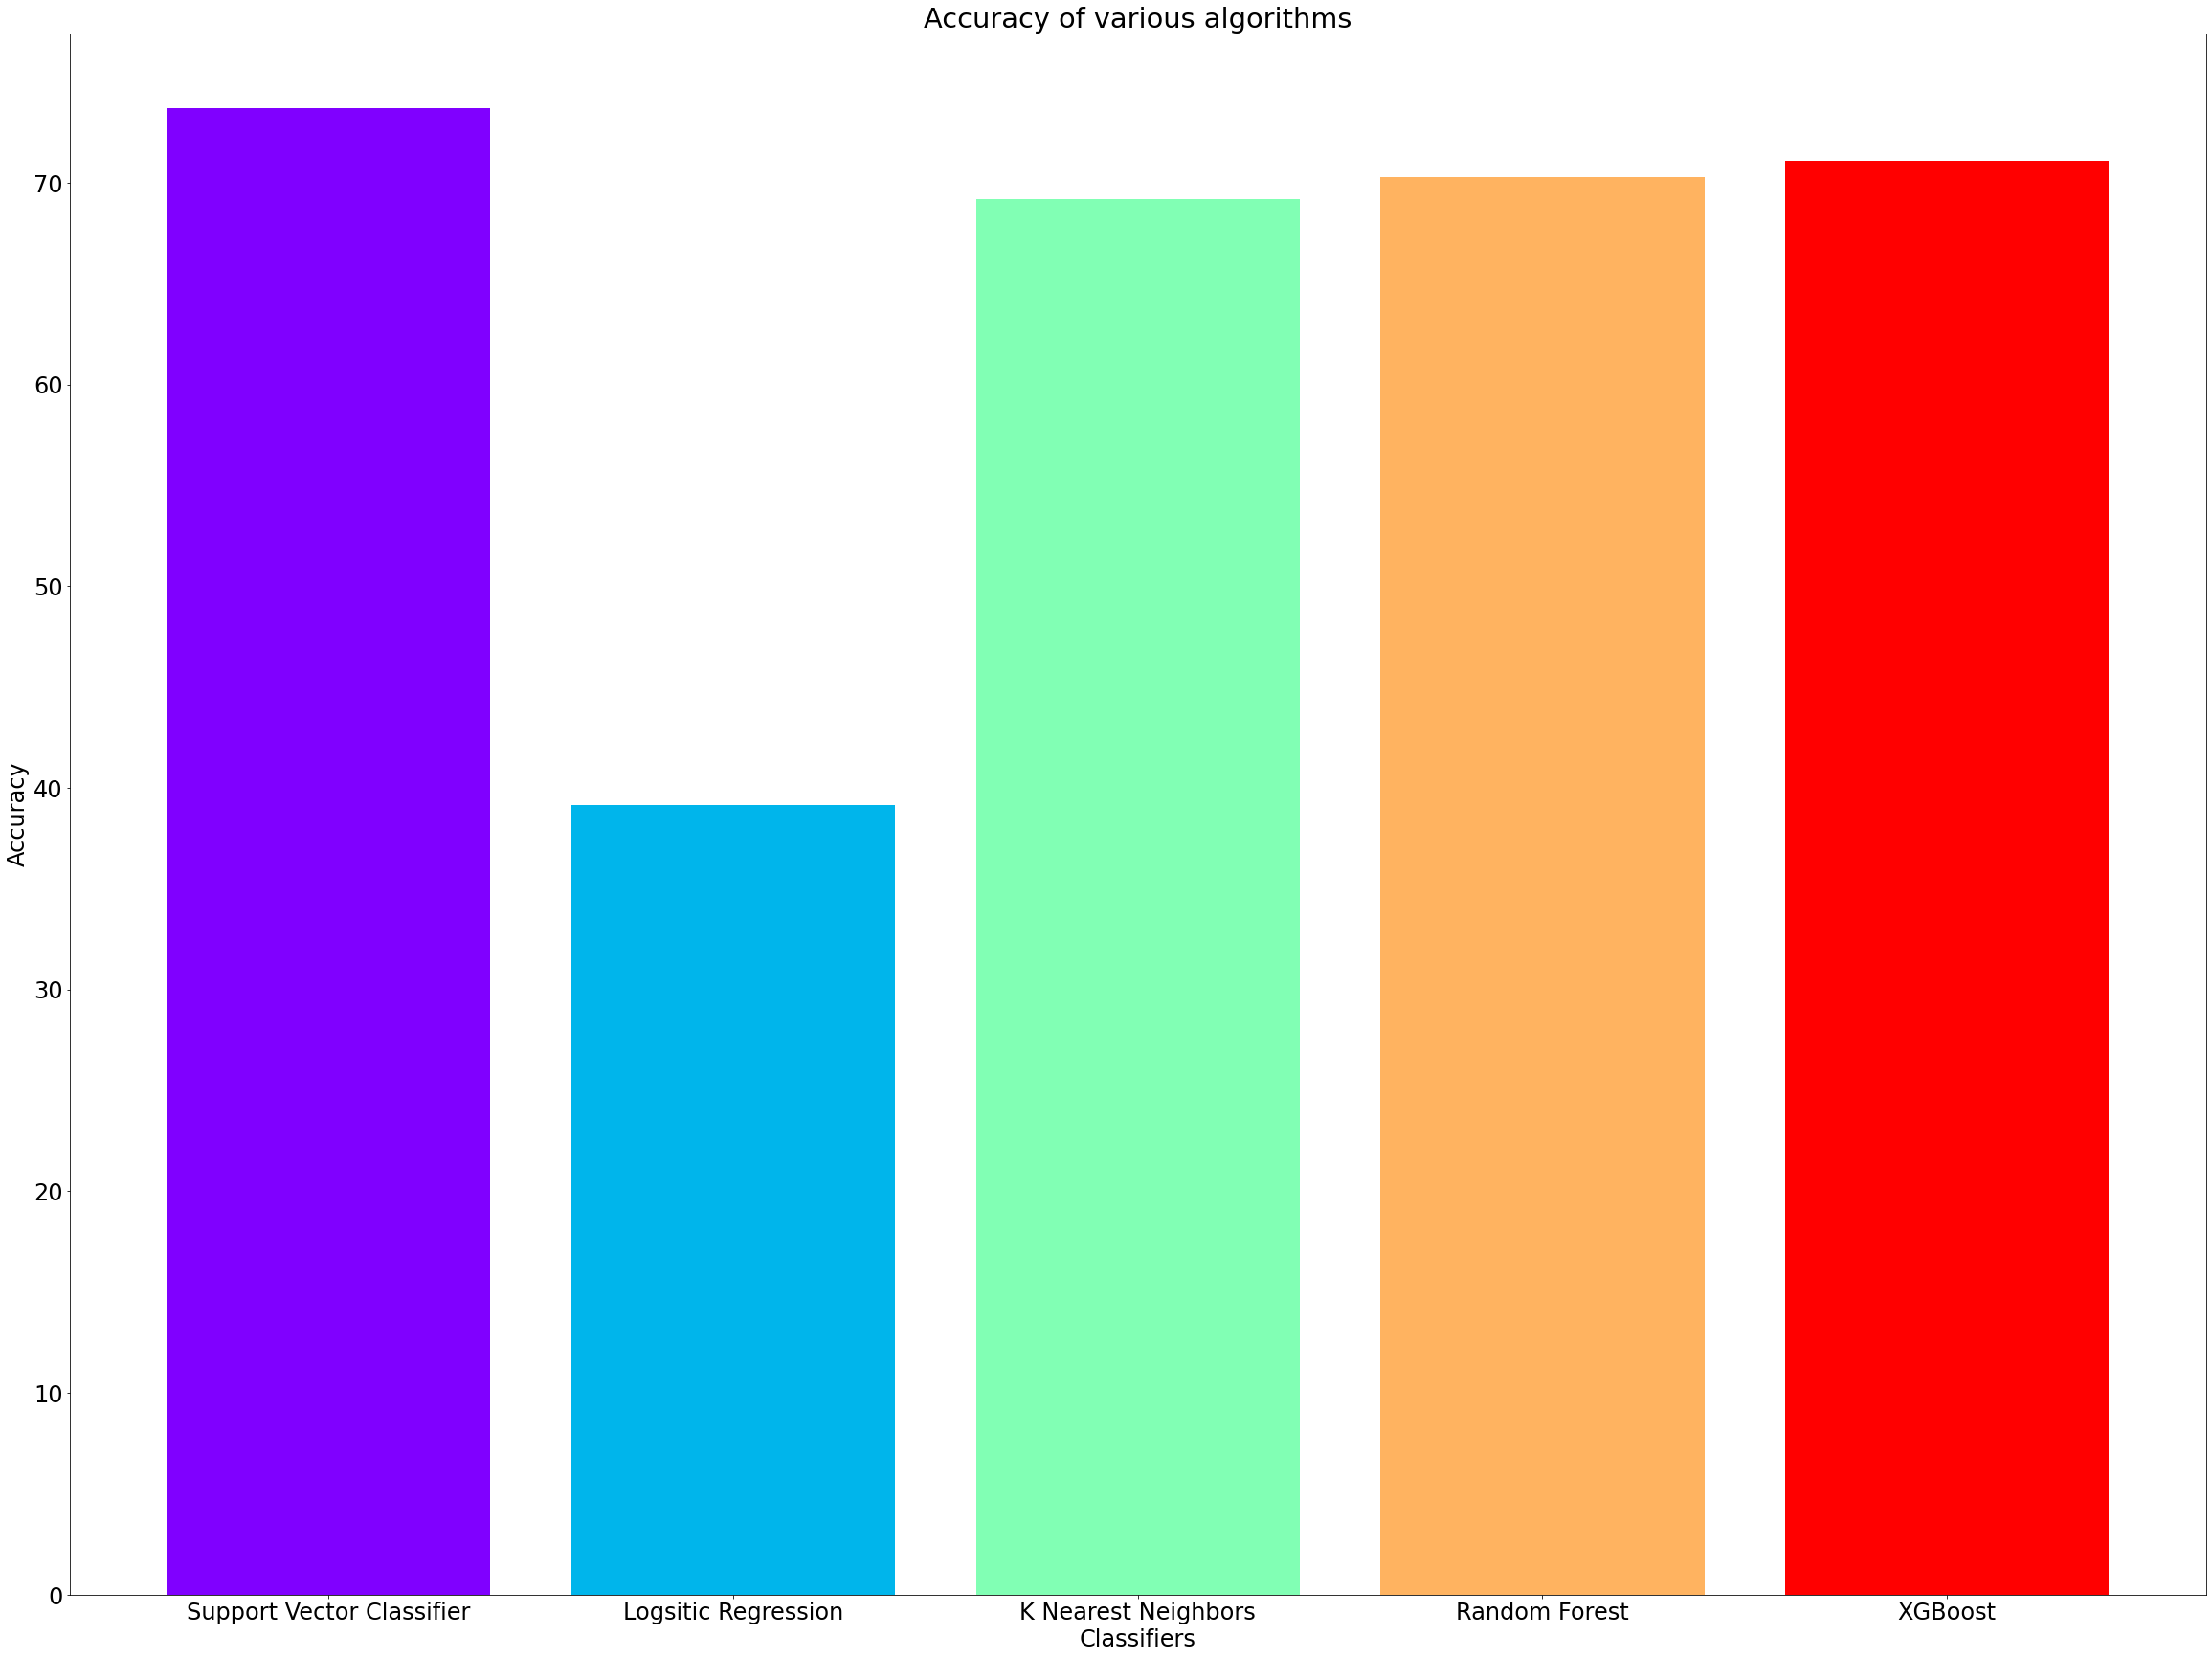

In [48]:
colors = cm.rainbow(np.linspace(0, 1, 5))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest', 'XGBoost']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')